## pd.to_datetime(時間,format):取值(dt.year or strftime("%A"))

## datetime(year,month,day):取值(strftime("%A"))

## parser.parse(時間):取值(strftime("%A"))

## np.datetime64

## pd.to_timedelta(np.arange(12),'D')

## pd.date_range,pd.period_range,pd.timedelta_range(時間,periods,freq)

In [ ]:
train.registration_init_time = pd.to_datetime(train.registration_init_time, format='%Y%m%d', errors='ignore')
train['registration_init_time_year'] = train['registration_init_time'].dt.year
train['registration_init_time_month'] = train['registration_init_time'].dt.month
train['registration_init_time_day'] = train['registration_init_time'].dt.day

In [7]:
from datetime import datetime
datetime(year=2015,month=7,day=4)

datetime.datetime(2015, 7, 4, 0, 0)

In [2]:
from dateutil import parser
date=parser.parse("4th of July, 2015")
date

datetime.datetime(2015, 7, 4, 0, 0)

In [3]:
date.strftime('%A')

'Saturday'

In [4]:
import numpy as np
date=np.array('2015-07-04',dtype=np.datetime64)
date

array('2015-07-04', dtype='datetime64[D]')

In [5]:
date+np.arange(12)

array(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
       '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
       '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
      dtype='datetime64[D]')

In [6]:
np.datetime64('2015-07-04')

numpy.datetime64('2015-07-04')

In [7]:
np.datetime64('2015-07-04 12:00')

numpy.datetime64('2015-07-04T12:00')

In [8]:
np.datetime64('2015-07-04 12:59:59.50','ns')

numpy.datetime64('2015-07-04T12:59:59.500000000')

In [1]:
import pandas as pd
date=pd.to_datetime("4th of July, 2015")
date

Timestamp('2015-07-04 00:00:00')

In [2]:
date.strftime('%A')

'Saturday'

In [5]:
date+pd.to_timedelta(np.arange(12),'D')

DatetimeIndex(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
               '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
               '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
              dtype='datetime64[ns]', freq=None)

## 使用時間做索引

In [12]:
index=pd.DatetimeIndex(['2014-07-04','2014-08-04','2015-07-04','2015-08-04'])
data=pd.Series([0,1,2,3],index=index)
data

2014-07-04    0
2014-08-04    1
2015-07-04    2
2015-08-04    3
dtype: int64

In [13]:
data['2015']

2015-07-04    2
2015-08-04    3
dtype: int64

In [8]:
dates=pd.to_datetime([datetime(2015,7,3),'4th of July, 2015','2015-Jul-6','07-07-2015','20150708'])
dates

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
               '2015-07-08'],
              dtype='datetime64[ns]', freq=None)

In [9]:
dates.to_period('D')

PeriodIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
             '2015-07-08'],
            dtype='period[D]', freq='D')

In [12]:
(dates-dates[0]).days

array([ True,  True,  True,  True,  True])

In [17]:
pd.date_range('2015-07-03','2015-07-10')

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [19]:
pd.date_range('2015-07-03',periods=8)

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [20]:
pd.date_range('2015-07-03',periods=8,freq="H")

DatetimeIndex(['2015-07-03 00:00:00', '2015-07-03 01:00:00',
               '2015-07-03 02:00:00', '2015-07-03 03:00:00',
               '2015-07-03 04:00:00', '2015-07-03 05:00:00',
               '2015-07-03 06:00:00', '2015-07-03 07:00:00'],
              dtype='datetime64[ns]', freq='H')

In [21]:
pd.period_range('2015-07',periods=10,freq='M')

PeriodIndex(['2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
             '2016-01', '2016-02', '2016-03', '2016-04'],
            dtype='period[M]', freq='M')

In [22]:
pd.timedelta_range(0,periods=10,freq='H')

TimedeltaIndex(['00:00:00', '01:00:00', '02:00:00', '03:00:00', '04:00:00',
                '05:00:00', '06:00:00', '07:00:00', '08:00:00', '09:00:00'],
               dtype='timedelta64[ns]', freq='H')

In [23]:
pd.timedelta_range(0,periods=9,freq="2H30T")

TimedeltaIndex(['00:00:00', '02:30:00', '05:00:00', '07:30:00', '10:00:00',
                '12:30:00', '15:00:00', '17:30:00', '20:00:00'],
               dtype='timedelta64[ns]', freq='150T')

In [24]:
from pandas.tseries.offsets import BDay
pd.date_range('2015-07-01',periods=5,freq=BDay())

DatetimeIndex(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-06',
               '2015-07-07'],
              dtype='datetime64[ns]', freq='B')

In [26]:
from pandas_datareader import data
goog=data.DataReader('GOOG',start='2004',end='2016',data_source='yahoo')
goog.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2004-08-19,51.835709,47.800831,49.813286,49.982655,44871300.0,49.982655
2004-08-20,54.336334,50.062355,50.316402,53.952770,22942800.0,53.952770
2004-08-23,56.528118,54.321388,55.168217,54.495735,18342800.0,54.495735
2004-08-24,55.591629,51.591621,55.412300,52.239193,15319700.0,52.239193
2004-08-25,53.798351,51.746044,52.284027,52.802086,9232100.0,52.802086


In [36]:
goog=goog['Close']

In [37]:
import matplotlib.pyplot as plt
import seaborn;seaborn.set()

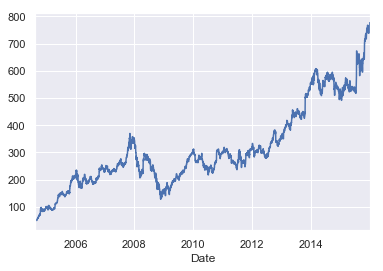

In [38]:
goog.plot();

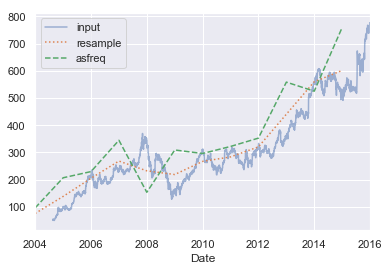

In [39]:
goog.plot(alpha=0.5,style="-")
goog.resample('BA').mean().plot(style=':')
goog.asfreq('BA').plot(style='--');
plt.legend(['input','resample','asfreq'],loc='upper left')

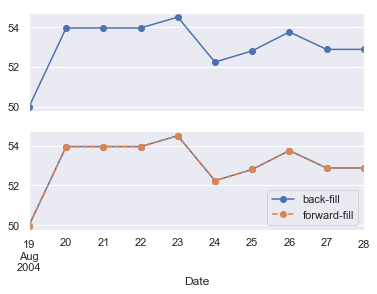

In [40]:
fig,ax=plt.subplots(2,sharex=True)
data=goog.iloc[:10]
data.asfreq('D').plot(ax=ax[0],marker='o')
data.asfreq('D',method='bfill').plot(ax=ax[1],style='-o')
data.asfreq('D',method='ffill').plot(ax=ax[1],style='--o')
ax[1].legend(['back-fill','forward-fill'])

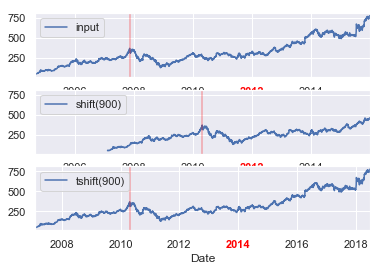

In [41]:
fig,ax=plt.subplots(3,sharey=True)
goog=goog.asfreq('D',method='pad')
goog.plot(ax=ax[0])
goog.shift(900).plot(ax=ax[1])
goog.tshift(900).plot(ax=ax[2])
local_max=pd.to_datetime('2007-11-05')
offset=pd.Timedelta(900,'D')
ax[0].legend(['input'],loc=2)
ax[0].get_xticklabels()[4].set(weight='heavy',color='red')
ax[0].axvline(local_max,alpha=0.3,color='red')
ax[1].legend(['shift(900)'],loc=2)
ax[1].get_xticklabels()[4].set(weight='heavy',color='red')
ax[1].axvline(local_max+offset,alpha=0.3,color='red')
ax[2].legend(['tshift(900)'],loc=2)
ax[2].get_xticklabels()[4].set(weight='heavy',color='red')
ax[2].axvline(local_max+offset,alpha=0.3,color='red')

Text(0, 0.5, '% Return on Investment')

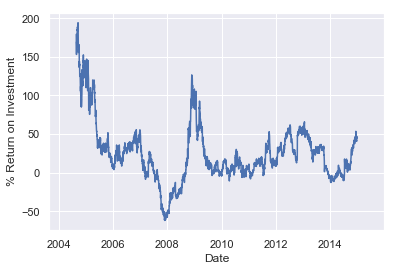

In [43]:
ROI=100*(goog.tshift(-365)/goog-1)
ROI.plot()
plt.ylabel('% Return on Investment')

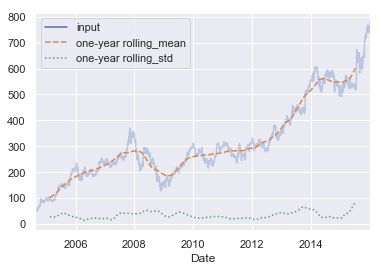

In [44]:
rolling=goog.rolling(365,center=True)
data=pd.DataFrame({'input':goog,'one-year rolling_mean':rolling.mean(),'one-year rolling_std':rolling.std()})
ax=data.plot(style=['-','--',':'])
ax.lines[0].set_alpha(0.3)

In [46]:
!curl -o FremonBridge.csv https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:02 --:--:--     0
100  175k    0  175k    0     0  59778      0 --:--:--  0:00:03 --:--:-- 45725
100 1422k    0 1422k    0     0   355k      0 --:--:--  0:00:04 --:--:--  289k
100 1721k    0 1721k    0     0   344k      0 --:--:--  0:00:05 --:--:--  415k


In [48]:
data=pd.read_csv('FremonBridge.csv',index_col='Date',parse_dates=True)

In [49]:
data.head()

,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,
2019-01-01 00:00:00,0.0,9.0
2019-01-01 01:00:00,2.0,22.0
2019-01-01 02:00:00,1.0,11.0
2019-01-01 03:00:00,1.0,2.0
2019-01-01 04:00:00,2.0,1.0


In [50]:
data.columns=['West','East']

In [51]:
data['Total']=data.eval('West+East')

In [52]:
data.dropna().describe()

,West,East,Total
count,61287.000000,61287.000000,61287.000000
mean,52.894790,61.444874,114.339664
std,67.815951,89.875981,145.211368
min,0.000000,0.000000,0.000000
25%,7.000000,7.000000,15.000000
50%,29.000000,30.000000,62.000000
75%,71.000000,74.000000,150.000000
max,698.000000,850.000000,1097.000000


Text(0, 0.5, 'Hourly Bicycle Count')

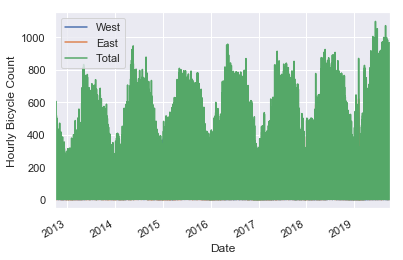

In [53]:
import seaborn;seaborn.set()
data.plot()
plt.ylabel('Hourly Bicycle Count')

Text(0, 0.5, 'Weekly bicycle count')

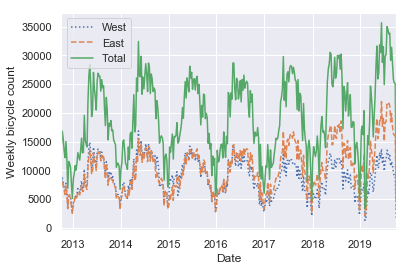

In [55]:
weekly=data.resample('W').sum()
weekly.plot(style=[':','--','-'])
plt.ylabel('Weekly bicycle count')

Text(0, 0.5, 'mean hourly count')

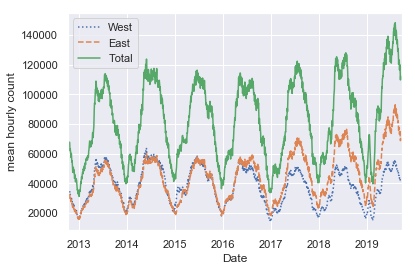

In [56]:
daily=data.resample('D').sum()
daily.rolling(30,center=True).sum().plot(style=[':','--','-'])
plt.ylabel('mean hourly count')

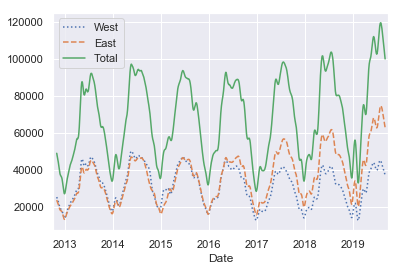

In [57]:
daily.rolling(50,center=True,win_type='gaussian').sum(std=10).plot(style=[':','--','-'])

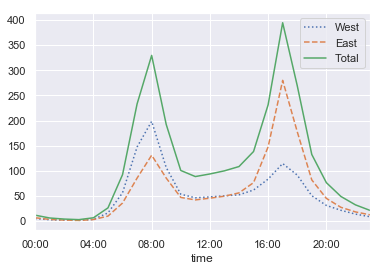

In [59]:
by_time=data.groupby(data.index.time).mean()
hourly_ticks=4*60*60*np.arange(6)
by_time.plot(xticks=hourly_ticks,style=[":",'--','-'])

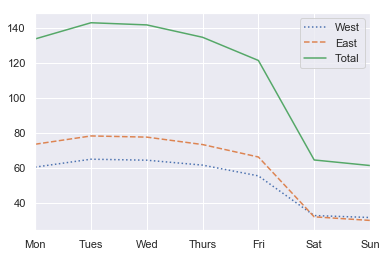

In [60]:
by_weekday=data.groupby(data.index.dayofweek).mean()
by_weekday.index=['Mon','Tues','Wed','Thurs','Fri','Sat','Sun']
by_weekday.plot(style=[':','--','-'])

In [63]:
data.head()

,West,East,Total
Date,,,
2019-01-01 00:00:00,0.0,9.0,9.0
2019-01-01 01:00:00,2.0,22.0,24.0
2019-01-01 02:00:00,1.0,11.0,12.0
2019-01-01 03:00:00,1.0,2.0,3.0
2019-01-01 04:00:00,2.0,1.0,3.0


In [64]:
weekend=np.where(data.index.weekday<5,'weekday','weekend')
by_time=data.groupby([weekend,data.index.time]).mean()

In [66]:
by_time

West        East       Total
weekday 00:00:00    4.289474    5.638158    9.927632
        01:00:00    2.231360    2.682566    4.913925
        02:00:00    1.633224    1.652412    3.285636
        03:00:00    1.459430    1.341009    2.800439
        04:00:00    4.304276    3.456140    7.760417
        05:00:00   21.259320   12.713268   33.972588
        06:00:00   75.686404   46.796053  122.482456
        07:00:00  199.649123  113.598136  313.247259
        08:00:00  264.989035  171.995614  436.984649
        09:00:00  131.913878  104.257268  236.171146
        10:00:00   53.517828   47.388371  100.906199
        11:00:00   39.803620   36.080636   75.884257
        12:00:00   39.780033   38.393308   78.173341
        13:00:00   41.923246   42.398026   84.321272
        14:00:00   44.238487   51.272478   95.510965
        15:00:00   58.081689   80.104167  138.185855
        16:00:00   90.699561  181.498355  272.197917
        17:00:00  138.552083  370.560855  509.112939
        18:00:00  111.139254  232.707237  343.846491
        19:00:00   59.467105  103.350329  162.817434
        20:00:00   35.828399   54.611294   90.439693
        21:00:00   24.645285   32.141996   56.787281
        22:00:00   15.536732   20.751645   36.288377
        23:00:00    9.354167   13.413925   22.768092
weekend 00:00:00    6.967123    9.686301   16.653425
        01:00:00    4.310959    5.360274    9.671233
        02:00:00    2.936552    3.315862    6.252414
        03:00:00    1.838356    1.791781    3.630137
        04:00:00    1.669863    2.360274    4.030137
        05:00:00    4.091781    3.480822    7.572603
        06:00:00    8.257534    9.142466   17.400000
        07:00:00   17.294521   15.779452   33.073973
        08:00:00   32.327397   28.852055   61.179452
        09:00:00   43.693151   39.236986   82.930137
        10:00:00   53.871233   46.616438  100.487671
        11:00:00   63.030137   57.606849  120.636986
        12:00:00   68.989041   63.894521  132.883562
        13:00:00   71.606849   67.784932  139.391781
        14:00:00   72.678082   68.547945  141.226027
        15:00:00   71.323288   67.806849  139.130137
        16:00:00   65.854795   63.156164  129.010959
        17:00:00   54.650685   53.521918  108.172603
        18:00:00   42.812329   41.430137   84.242466
        19:00:00   28.308219   28.831507   57.139726
        20:00:00   19.997260   22.063014   42.060274
        21:00:00   14.012329   15.993151   30.005479
        22:00:00   10.250685   12.505479   22.756164
        23:00:00    7.438356   10.573973   18.012329

C:\Users\a2279\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\a2279\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


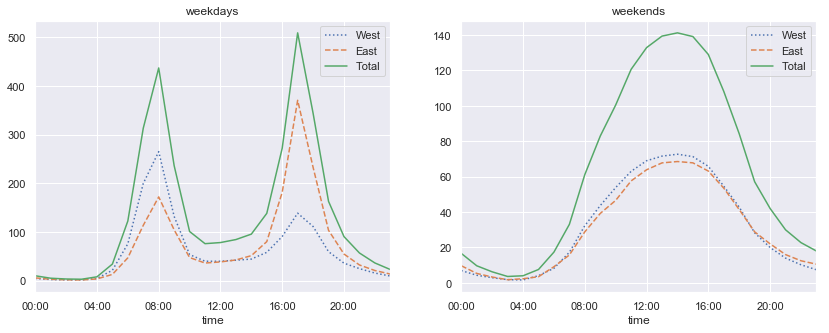

In [67]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots(1,2,figsize=(14,5))
by_time.ix["weekday"].plot(ax=ax[0],title='weekdays',xticks=hourly_ticks,style=[':','--','-'])
by_time.ix["weekend"].plot(ax=ax[1],title='weekends',xticks=hourly_ticks,style=[':','--','-'])